<a href="https://colab.research.google.com/github/sujeengim/mini-ai-study/blob/main/intro/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 두 종류의 생선 분류 프로그램 1 :
## k-최근접 이웃 알고리즘:
어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용

- 사용
1. 데이터 모두 준비
2. 새로운 데이터 예측시 가장 가까운 직선거리에 어떤 데이터가 있는지 살핌
3. 데이터 많아질 경우 메모리  문제, 직선거리 계산 어려움
4. 준비 데이터 수가 차이날 경우 부정확

In [1]:
# 생선 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

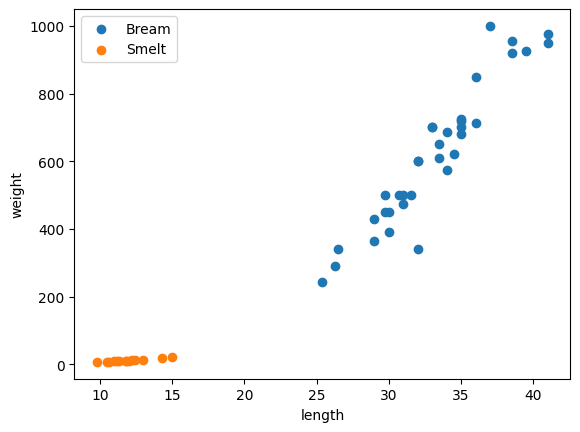

In [5]:
# 데이터 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend() # 범례
plt.show()

### 데이터 판단
- smelt보다 bream의 무게와 길이가 훨씬 크다.
- bream의 길이에 따른 무게 차이가 크다.
- smelt는 bream에 비해 길이에 따른 무게 차이가 크지 않다.

In [10]:
# 데이터 구분 프로그램 구현

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 2차원 리스트 생성
fish_data = [[l, w] for l,w in zip(length, weight)]

# 정답 데이터 생성
fish_target = [1]*35 + [0]*14 #bream35개, smelt14개

# k-최근접 이웃 알고리즘 클래스 적용
from sklearn.neighbors import KNeighborsClassifier

kn5 = KNeighborsClassifier(n_neighbors=5) #주위 참고 데이터  5개

# 훈련: 분류 기준 학습시키기->규칙 찾기
kn5.fit(fish_data, fish_target)

# 모델(머신러닝 알고리즘을 구현한 프로그램) 평가
acc = kn5.score(fish_data, fish_target) #정확도 accuracy

print('정확도:', acc)

정확도: 1.0


In [12]:
# 새로운 데이터 예측
kn5.predict([[30, 600]]) #그래프 상 bream

array([1])